# 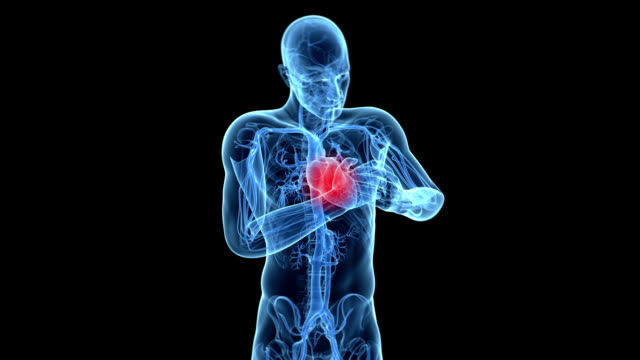

In [104]:
# importing required packages for eda

import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import warnings
warnings.filterwarnings("ignore")

In [105]:
# !pip install scikit-learn

In [106]:
# !pip install cufflinks

In [107]:
# !pip install pandas

In [108]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [109]:
# importing csv format data to dataframe names as 'heart'
heart = pd.read_csv('heart-failure.csv')

In [110]:
 heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [111]:
heart.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
308,58,M,ASY,115,0,1,Normal,138,N,0.5,Up,1
380,60,M,ASY,160,0,0,ST,99,Y,0.5,Flat,1
539,57,M,ASY,110,197,0,LVH,100,N,0.0,Up,0
816,58,M,ASY,125,300,0,LVH,171,N,0.0,Up,1
797,41,M,ASY,110,172,0,LVH,158,N,0.0,Up,1
337,63,M,ASY,150,0,1,ST,154,N,3.7,Up,1
841,62,F,NAP,130,263,0,Normal,97,N,1.2,Flat,1
803,62,F,ASY,140,394,0,LVH,157,N,1.2,Flat,0
29,51,M,ATA,125,188,0,Normal,145,N,0.0,Up,0
220,46,M,ASY,130,222,0,Normal,112,N,0.0,Flat,1


In [112]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [113]:
heart.nunique() #how many unique values we have in our Dataset for each column

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [114]:
heart['HeartDisease'] # Total number of rows in dataset ie: 917 w.r.t target feature.

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [115]:
heart.groupby('HeartDisease').size()

HeartDisease
0    410
1    508
dtype: int64

In [116]:
heart.groupby('Sex').size() # based on gender from the whole dataset
#no of females and males present in whole dataset.

Sex
F    193
M    725
dtype: int64

In [117]:
heart.groupby(['Sex', 'HeartDisease']).size() # based on gender, but in group wise targated variable.
#In the statistical data below we can observe that among females, there is a total of 143 females who do not have heart disease.
#and a total 50 females who have heart disease.  
#This conclusion includes all female paricipants who took part in the study, totalling 193. 
#Males
#267 males who do not have heart disease.
#458 males who has heart disease. 
#total 267+458=725 males in overall dataset.

Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
dtype: int64

In [118]:
heart.shape

(918, 12)

In [119]:
heart.size #size = 918 * 12 = 11016

11016

In [120]:
heart.describe() 
#This Describes the statistics summary only on numerical data, not on categorical data. 
#If we need to analyse statistical values of 
#categorial data then we will have to clean the data and convert categorial values into numerical values.
#eg: in the data below we can compare the cholesterol levels between the 918 rows of data, with the healthy average being 198.
# where some people have cholesterol levels as low as 0.0, the  maximum cholestrol level reaches 603.
#25% of people have cholesterol levels of 173. 
#50% of people have cholesterol levels of 223. 
#75% of people have cholesterol levels of 267.

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [121]:
# Handling Null Values 

heart.info() #information about dataframe.
#where non-null count determines that there is no null values or empty values in any of the columns
#Dtype refers to data type of each column where age is int64 (integer value) & all the categorical values will be determined 
#as object dtype 
#so ml model can take only integer and float value but not object values so thats why further while modelling we will convert
#all the categorical values to numerical values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [122]:
heart['HeartDisease'].unique() #how many unique values we have in our target feature (Y).
#0 = no heart disease
#1 = heart disease

array([0, 1], dtype=int64)

# Visualization

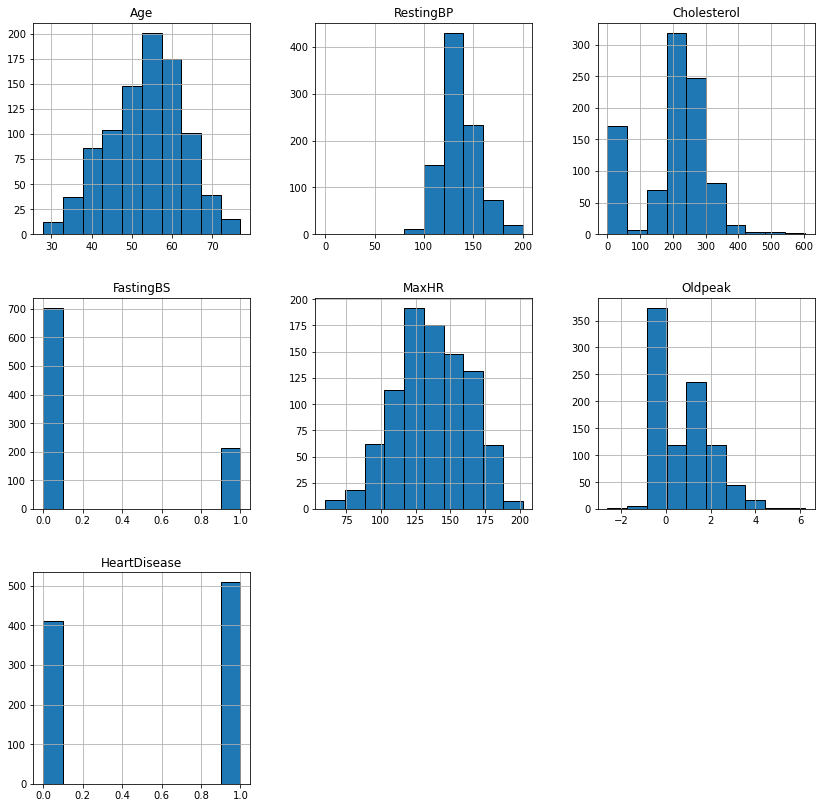

In [123]:
#In matplotlib we use hist() function to create histograms.
#.hist() function will create histogram bar chart for all the columns present in dataset in vector x.
#note: This does not include columns which have categorical values
heart.hist(figsize=(14,14),edgecolor='black') #figure size(figsize) means chart size. 
plt.show() #this function is used to display all figures.

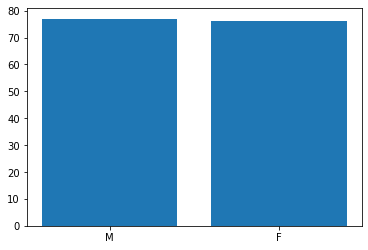

In [124]:
plt.bar(x=heart['Sex'],height=heart['Age'])
plt.show()

In [125]:
px.bar(x="MaxHR", y="HeartDisease", data_frame=heart) #this visualization uses Plotly library which is more interactive.

In [126]:
px.bar(data_frame = heart, x="Age",y='HeartDisease')

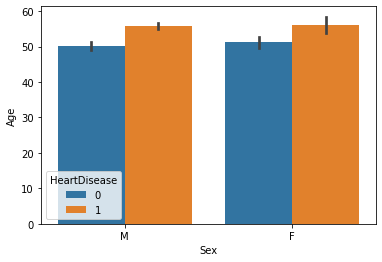

In [128]:
sns.barplot(x=heart['Sex'],y=heart['Age'],hue=heart['HeartDisease'])
plt.show()

In [129]:
heart.groupby(['Sex', 'HeartDisease']).size()

Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
dtype: int64

In [130]:
px.bar(x="Sex",y='HeartDisease', data_frame = heart,color='Age')

In [131]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

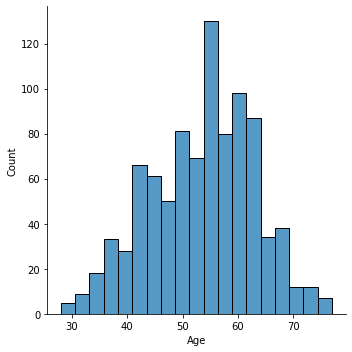

In [132]:
sns.displot(heart["Age"]) #seaborn library 
plt.show() #reason we use function from matplotlib in order to display the graph 
            #is to overcome from <seaborn.axisgrid.FacetGrid at 0x1e2bae81550> this error
    

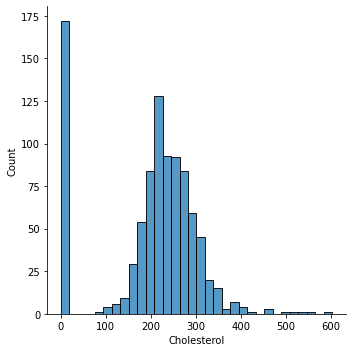

In [133]:
sns.displot(heart["Cholesterol"])
plt.show()

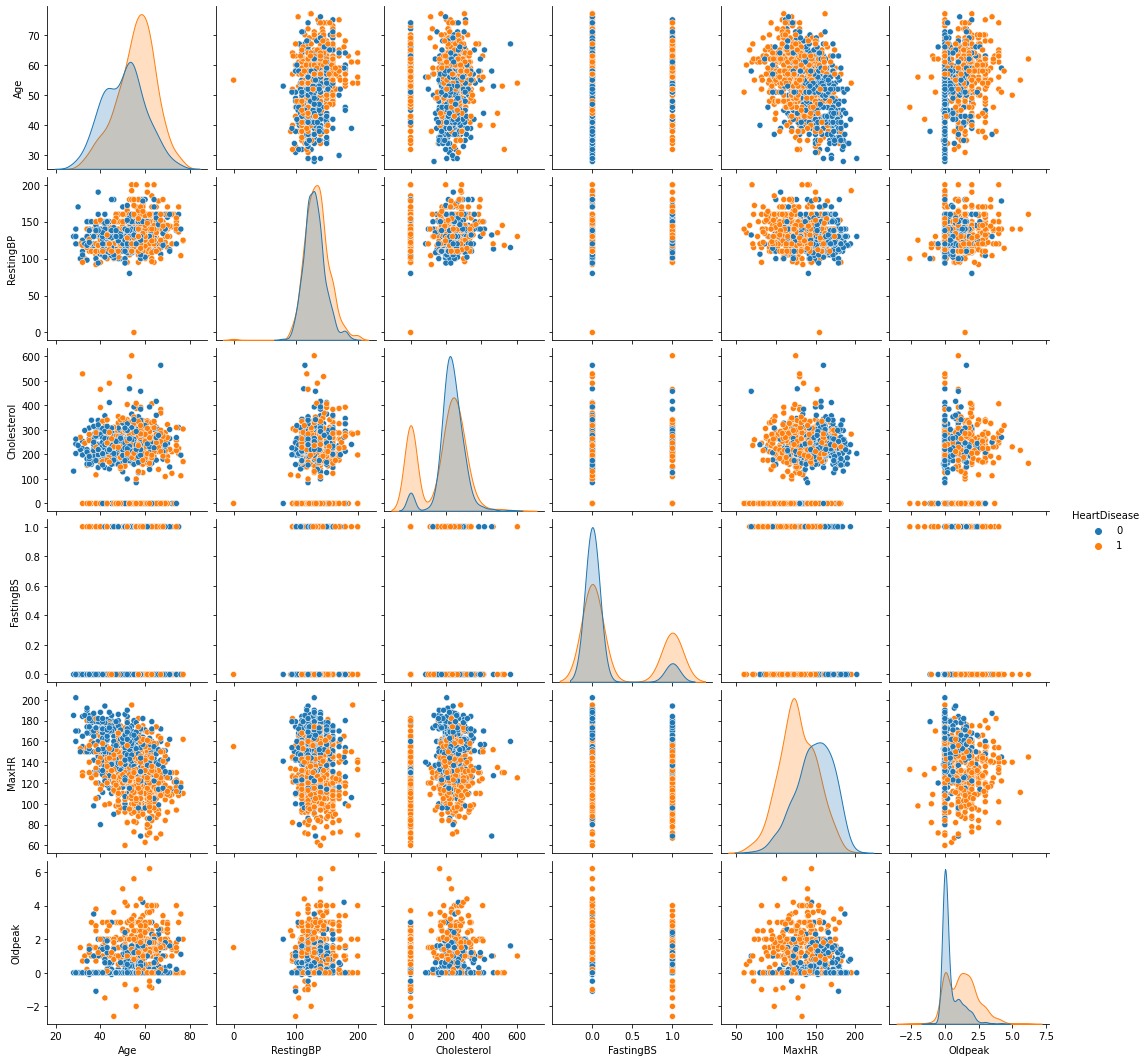

In [134]:
sns.pairplot(heart,hue='HeartDisease')
#To plot multiple pairwise quantity distributions in an exceedingly dataset, 
#you'll be able to use the pairplot() function. 
#This shows the link for (n, 2) combination of variable in a DataFrame as a matrix of plots 
#and therefore the diagonal plots are the univariate plots.
plt.show()

In [135]:
numeric_columns=['RestingBP','Cholesterol','MaxHR','Age']

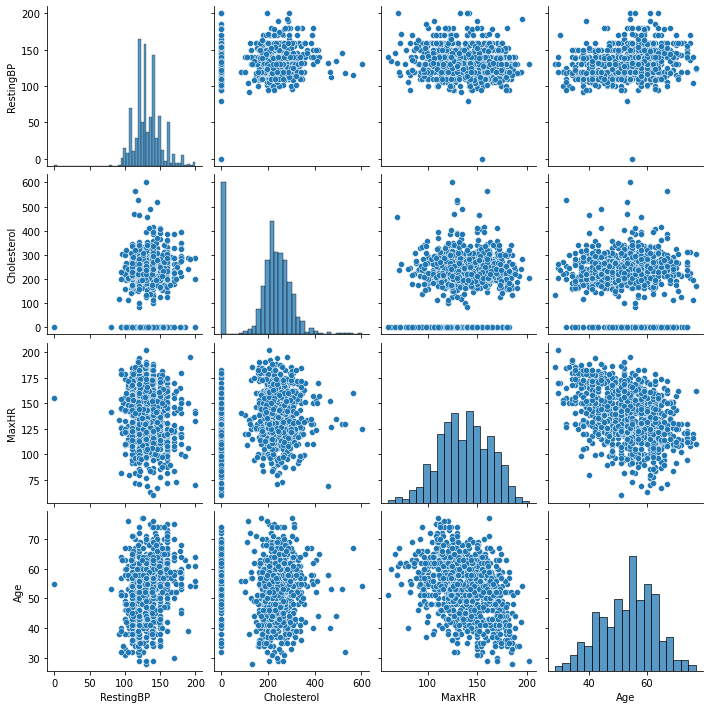

In [136]:
sns.pairplot(heart[numeric_columns])
plt.show()

In [137]:
heart['HeartDisease']

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

1    508
0    410
Name: HeartDisease, dtype: int64


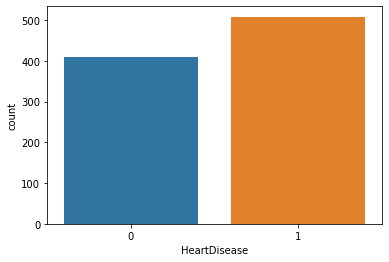

In [138]:
y = heart["HeartDisease"]
sns.countplot(y)
target_temp = heart.HeartDisease.value_counts()
print(target_temp)

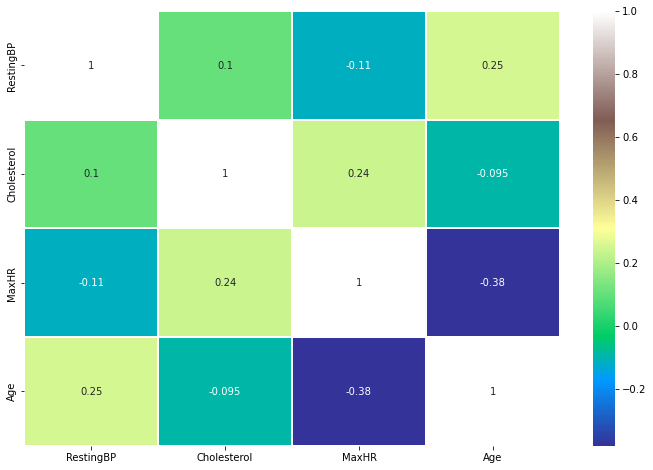

In [139]:
# create a correlation heatmap
# seaborn heatmap visualise 2d data. 
# where each feature value in the matrix has its own color combination.
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

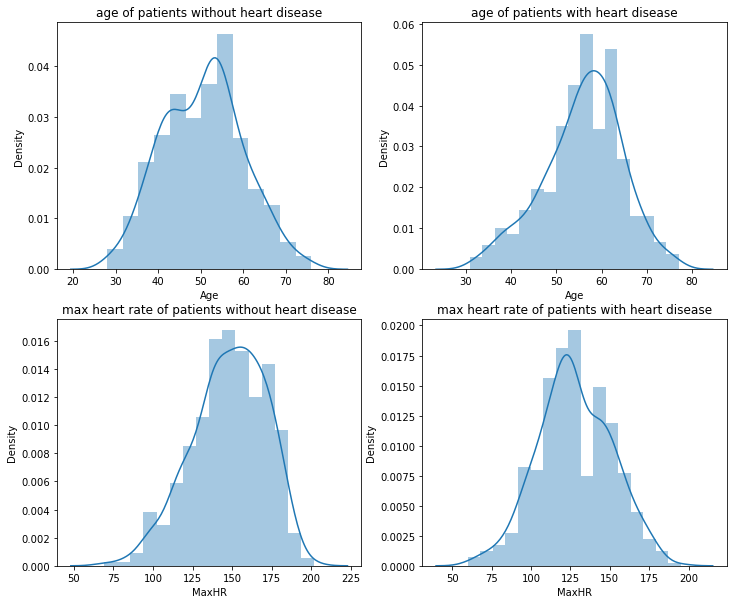

In [140]:
# create four distplots
# Another 4 plots using seaborn library
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['HeartDisease']==0].Age)
plt.title('age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['HeartDisease']==1].Age)
plt.title('age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['HeartDisease']==0].MaxHR )
plt.title('max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['HeartDisease']==1].MaxHR )
plt.title('max heart rate of patients with heart disease')
plt.show()

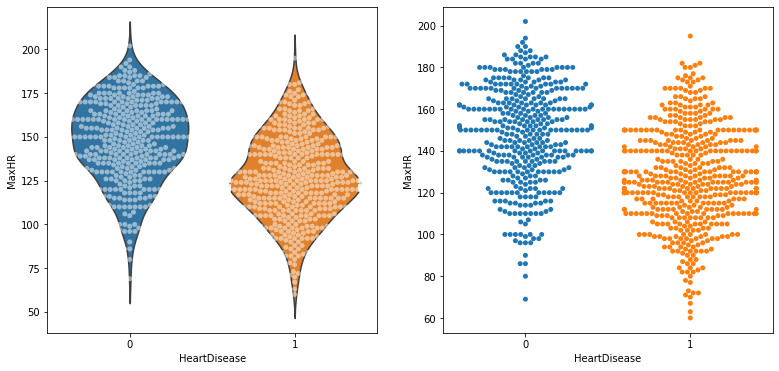

In [141]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="HeartDisease", y="MaxHR", data=heart, inner=None)
#Violinplot shows various quantitive data across one or more feature variable. 
#Whereas wide form usually determines the average numeric value.
sns.swarmplot(x="HeartDisease", y="MaxHR", data=heart, color='w', alpha=0.5)
#Seaborn swarmplot is similar to violin plot but with no borders, 
#swarm plot is visualised with the help of swarmplot() method
plt.subplot(122)
sns.swarmplot(x="HeartDisease", y="MaxHR", data=heart)
plt.show()

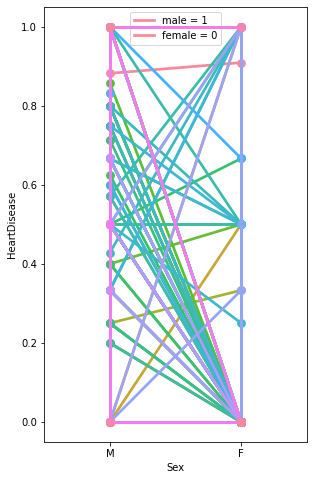

In [142]:
# create pairplot and two barplots
plt.figure(figsize=(16,8))
plt.subplot(131)
sns.pointplot(x="Sex", y="HeartDisease", hue='Cholesterol', data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.show()